<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.1 Load the libraries:

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn import svm

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.2. Import the dataset(Bank_Personal_Loan_Modelling.csv)

In [119]:
Data  = pd.read_csv('Bank_Personal_Loan_Modelling.csv') # Import the dataset named 'Admission_predict.csv'
Data.head()  # view the first 5 rows of the data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.3 Check the Dimension of data?

In [120]:
Data = Data.drop(['ID','ZIP Code'],axis=1)

Data.shape # see the shape of the data

(5000, 12)

##### There are 5000 Observations / Rows and 14 Attributes / Columns.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.4 Check the Information about the data and the datatypes of each respective attributes

In [121]:
Data.info() # To see the data type of each of the variable, number of values entered in each of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.5 Check the data.describe()

In [122]:
Data.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Quantile 25%

In [123]:
print("Data_quantile(25%):",Data.quantile(q=0.25))  # Prints the value below which 25% of the data lies

Data_quantile(25%): Age                   35.0
Experience            10.0
Income                39.0
Family                 1.0
CCAvg                  0.7
Education              1.0
Mortgage               0.0
Personal Loan          0.0
Securities Account     0.0
CD Account             0.0
Online                 0.0
CreditCard             0.0
Name: 0.25, dtype: float64


### Quantile 50%

In [124]:
print("Data_quantile(50%):",Data.quantile(q=0.50))  # Prints the value below which 50% of the data lies

Data_quantile(50%): Age                   45.0
Experience            20.0
Income                64.0
Family                 2.0
CCAvg                  1.5
Education              2.0
Mortgage               0.0
Personal Loan          0.0
Securities Account     0.0
CD Account             0.0
Online                 1.0
CreditCard             0.0
Name: 0.5, dtype: float64


### Quantile 75%

In [125]:
print("Data_quantile(75%):",Data.quantile(q=0.75))   # Prints the value below which 75% of the data lies

Data_quantile(75%): Age                    55.0
Experience             30.0
Income                 98.0
Family                  3.0
CCAvg                   2.5
Education               3.0
Mortgage              101.0
Personal Loan           0.0
Securities Account      0.0
CD Account              0.0
Online                  1.0
CreditCard              1.0
Name: 0.75, dtype: float64


In [126]:
print(Data.var())

Age                     131.404166
Experience              131.513962
Income                 2119.104235
Family                    1.317130
CCAvg                     3.054312
Education                 0.705380
Mortgage              10345.697538
Personal Loan             0.086801
Securities Account        0.093519
CD Account                0.056763
Online                    0.240678
CreditCard                0.207606
dtype: float64


#### varience

In [127]:
print(Data.var())

Age                     131.404166
Experience              131.513962
Income                 2119.104235
Family                    1.317130
CCAvg                     3.054312
Education                 0.705380
Mortgage              10345.697538
Personal Loan             0.086801
Securities Account        0.093519
CD Account                0.056763
Online                    0.240678
CreditCard                0.207606
dtype: float64


### Standard Deviation

In [128]:
print(Data.std())

Age                    11.463166
Experience             11.467954
Income                 46.033729
Family                  1.147663
CCAvg                   1.747659
Education               0.839869
Mortgage              101.713802
Personal Loan           0.294621
Securities Account      0.305809
CD Account              0.238250
Online                  0.490589
CreditCard              0.455637
dtype: float64


### Covariance

In [129]:
Data.cov()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,131.404166,130.698543,-29.164822,-0.610664,-1.041997,0.397949,-14.619518,-0.026092,-0.001529,0.021965,0.077058,0.040118
Experience,130.698543,131.513962,-24.587099,-0.691802,-1.003637,0.126673,-12.342843,-0.025047,-0.004321,0.028288,0.078190,0.046857
Income,-29.164822,-24.587099,2119.104235,-8.320957,51.970200,-7.250120,968.321693,6.814640,-0.036834,1.861611,0.320822,-0.050025
Family,-0.610664,-0.691802,-8.320957,1.317130,-0.219174,0.062584,-2.386602,0.020750,0.007017,0.003858,0.005830,0.006060
CCAvg,-1.041997,-1.003637,51.970200,-0.219174,3.054312,-0.199803,19.536778,0.188910,0.008063,0.056850,-0.003096,-0.005327
Education,0.397949,0.126673,-7.250120,0.062584,-0.199803,0.705380,-2.847012,0.033831,-0.002777,0.002788,-0.006182,-0.004215
Mortgage,-14.619518,-12.342843,968.321693,-2.386602,19.536778,-2.847012,10345.697538,4.258167,-0.168308,2.164305,-0.299144,-0.335114
Personal Loan,-0.026092,-0.025047,6.814640,0.020750,0.188910,0.033831,4.258167,0.086801,0.001978,0.022206,0.000907,0.000376
Securities Account,-0.001529,-0.004321,-0.036834,0.007017,0.008063,-0.002777,-0.168308,0.001978,0.093519,0.023099,0.001894,-0.002094
CD Account,0.021965,0.028288,1.861611,0.003858,0.056850,0.002788,2.164305,0.022206,0.023099,0.056763,0.020557,0.030248


##### Null value check

In [130]:
Data.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## BiVariate Plots

A bivariate analysis among the different variables can be done using scatter matrix plot. Seaborn libs create a dashboard reflecting useful information about the dimensions.

/home/mukesh/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mukesh/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/mukesh/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/mukesh/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

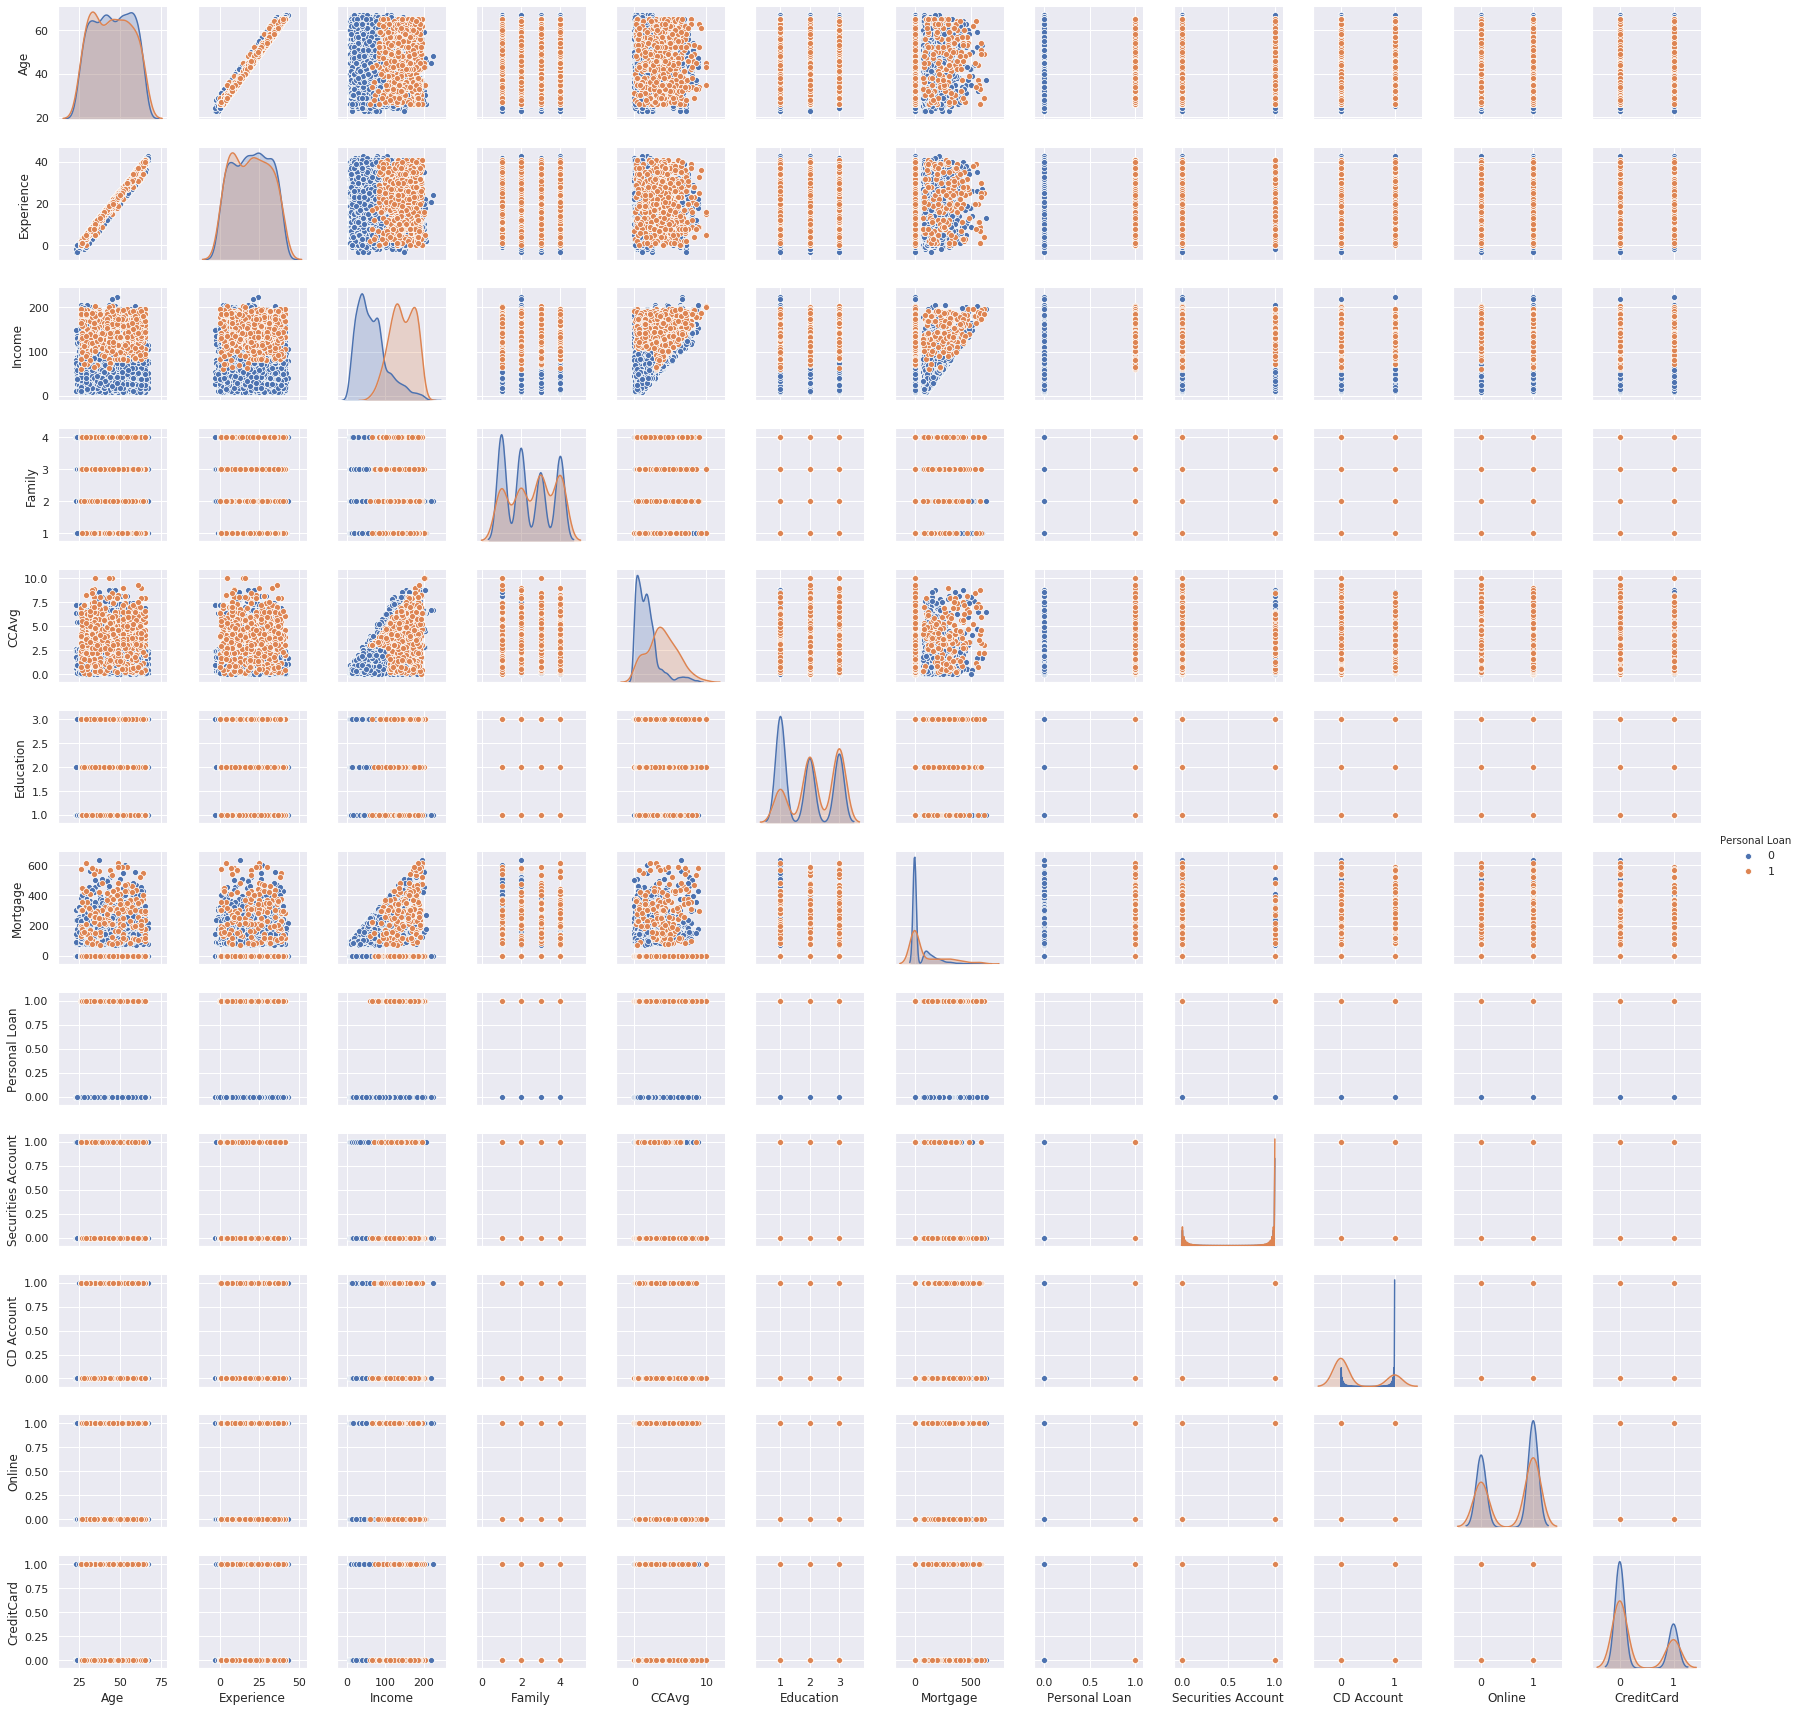

In [131]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.pairplot(Data, hue='Personal Loan',diag_kind='kde',height=2 )

## Split Data

In [132]:
# lets build our linear model
# independant variables
X = Data.drop(['Personal Loan'], axis=1)
# the dependent variable
y = Data[['Personal Loan']]

In [133]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

## Fit Linear Model

In [134]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Here are the coefficients for each variable and the intercept

In [135]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Age is -0.006320068543754435
The coefficient for Experience is 0.006529861380388194
The coefficient for Income is 0.002799060413220989
The coefficient for Family is 0.03318921310397412
The coefficient for CCAvg is 0.01709488340857628
The coefficient for Education is 0.07539726823349696
The coefficient for Mortgage is 8.764521250570859e-05
The coefficient for Securities Account is -0.07097481564396263
The coefficient for CD Account is 0.3301427526030487
The coefficient for Online is -0.02487944372034273
The coefficient for CreditCard is -0.04561220699166279


In [136]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.20096787096038


In [137]:
regression_model.score(X_train, y_train)

0.3916741993646933

In [138]:
#out of sample score (R^2)

regression_model.score(X_test, y_test)

0.3704486427505388

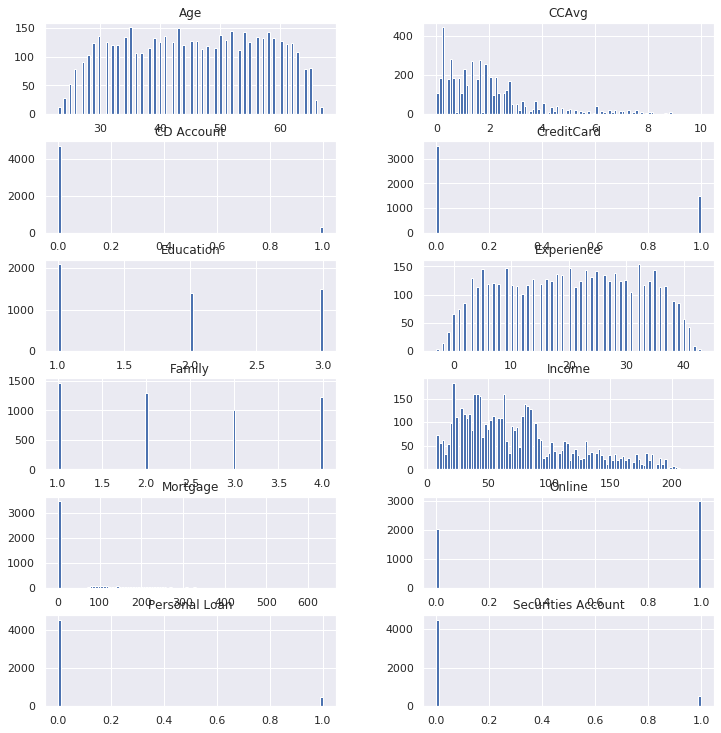

In [139]:
Data.hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));

## Identify Correlation in data 

In [140]:
Data.corr() # It will show correlation matrix 

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


In [141]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

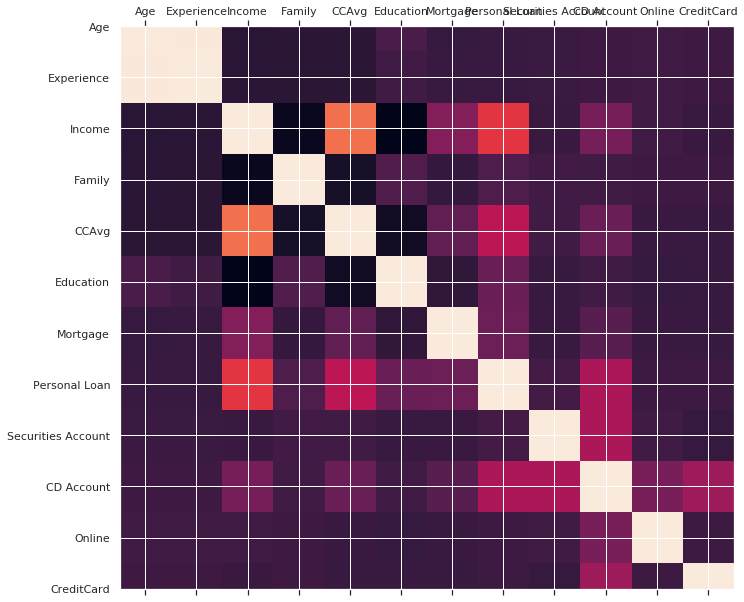

In [142]:
plot_corr(Data)

## Calculate Personal loan ratio of True/False from outcome variable 

In [143]:
n_true = len(Data.loc[Data['Personal Loan'] == True])
n_false = len(Data.loc[Data['Personal Loan'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 480 (9.60%)
Number of false cases: 4520 (90.40%)


So we have 9.60% people in current data set who get personal loan and rest of 90.40% doesn't have Personal loan.

# Data Preparation

### Check hidden missing values 

As we checked missing values earlier but haven't got any. But there can be lots of entries with 0 values. We must need to take care of those as well.

In [144]:
X_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,47,22,35,2,1.3,1,0,0,0,1,0
4768,38,14,39,1,2.0,2,0,0,0,1,0
65,59,35,131,1,3.8,1,0,0,0,1,1
177,29,3,65,4,1.8,2,244,0,0,0,0
4489,39,13,21,3,0.2,2,0,0,0,1,0


We can see lots of 0 entries above.

### Replace 0s with serial mean 

In [145]:
from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols=X_train.columns
X_train = pd.DataFrame(rep_0.fit_transform(X_train))
X_test = pd.DataFrame(rep_0.fit_transform(X_test))

X_train.columns = cols
X_test.columns = cols

X_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,47.0,22.0,35.0,2.0,1.3,1.0,181.659259,1.0,1.0,1.0,1.0
1,38.0,14.0,39.0,1.0,2.0,2.0,181.659259,1.0,1.0,1.0,1.0
2,59.0,35.0,131.0,1.0,3.8,1.0,181.659259,1.0,1.0,1.0,1.0
3,29.0,3.0,65.0,4.0,1.8,2.0,244.000000,1.0,1.0,1.0,1.0
4,39.0,13.0,21.0,3.0,0.2,2.0,181.659259,1.0,1.0,1.0,1.0


# Train Naive Bayes algorithm 

In [146]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
loan_model = GaussianNB()

loan_model.fit(X_train, y_train.values.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

### Performance of our model with training data

In [147]:
loan_train_predict = loan_model.predict(X_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, loan_train_predict)))
print()

Model Accuracy: 0.9043



### Performance of our model with testing data

In [148]:
loan_test_predict = loan_model.predict(X_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, loan_test_predict)))
print()

Model Accuracy: 0.8840



### Lets check the confusion matrix and classification report 

Confusion Matrix


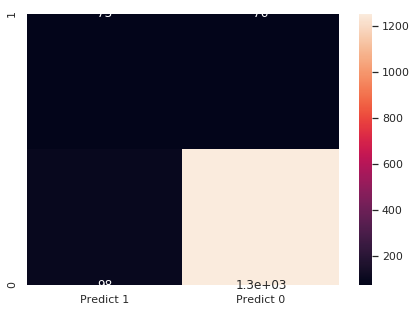

In [149]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, loan_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [150]:
print("Classification Report")
print(metrics.classification_report(y_test, loan_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.43      0.49      0.46       149
           0       0.94      0.93      0.94      1351

   micro avg       0.88      0.88      0.88      1500
   macro avg       0.68      0.71      0.70      1500
weighted avg       0.89      0.88      0.89      1500



We can see our true positive numbers with value 1 is of precision and recall is below 50%

# Build kNN Model

In [151]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [152]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

/home/mukesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

# Evaluate Performance of kNN Model

In [153]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.9026666666666666

## SVM

In [154]:
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x]== predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

## Build Model

In [155]:
clf = svm.SVC(gamma=0.025, C=3)

In [156]:
clf.fit(X_train , y_train)

/home/mukesh/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [160]:
y_pred = clf.predict(X_test)